In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_pl.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv
/kaggle/input/entity-sentiment-extraction-news/sen_pl_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv


In [2]:
SEN_en_AMT_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv', index_col=False)
SEN_en_R_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv', index_col=False)
SEN_en_R_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv', index_col=False)
SEN_en_AMT_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv', index_col=False)

In [3]:
SEN_en_AMT_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,Negative
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,Neutral
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,Neutral
3,3,Trump’s Arrival in London Brings Controversy b...,Trump,Negative
4,4,Trump Steers Clear of War Footing Toward Iran,Trump,Neutral


In [4]:
SEN_en_R_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Set to Meet With Russia’s Top Diplomat T...,Trump,neutr


In [5]:
SEN_en_R_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Calls for NATO Expansion Into Middle East,Trump,pos


In [6]:
SEN_en_AMT_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,neg
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,neutr
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,neutr
3,3,Trump Praises Lame-Duck U.K. Leader Theresa May,Trump,neutr
4,4,Trump’s Arrival in London Brings Controversy b...,Trump,neg


In [7]:
len(SEN_en_AMT_df), len(SEN_en_AMT_nooutlier_df)

(1361, 1345)

In [8]:
len(SEN_en_AMT_df.headline.unique())

1337

<Axes: xlabel='majority_label', ylabel='count'>

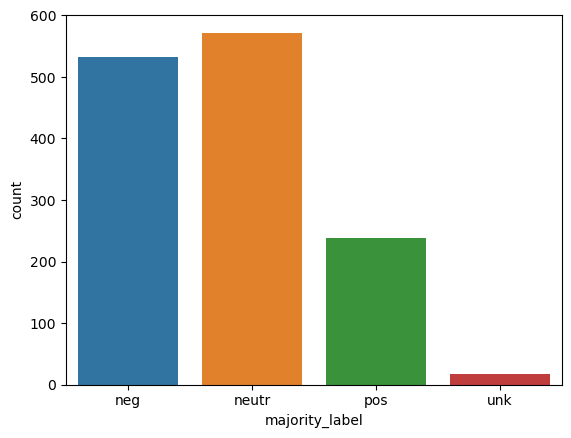

In [9]:
sns.countplot(SEN_en_AMT_df, x='majority_label')

In [10]:
len(SEN_en_R_df), len(SEN_en_R_nooutlier_df)

(1271, 1120)

<Axes: xlabel='majority_label', ylabel='count'>

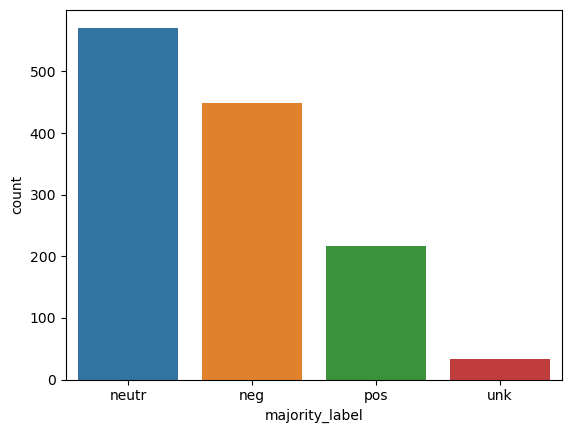

In [11]:
sns.countplot(SEN_en_R_df, x='majority_label')

In [12]:
SEN_en_AMT_df.iloc[0].headline

'Russia and Poland Feud Over Putin Remarks on World War II'

# Trying out with Bert-ABSA 
[Article](https://towardsdatascience.com/day-103-nlp-research-papers-utilizing-bert-for-aspect-based-sentiment-analysis-via-constructing-38ab3e1630a3)

In [13]:
!python -m pip install newsapi-python

from newsapi import NewsApiClient
from tqdm import tqdm, notebook
import pandas as pd

API_KEY = 'key'
newsapi = NewsApiClient(api_key=API_KEY)

from datetime import datetime, timedelta

def get_past_time_range(days=1):
    past_days = {}
    for day in range(1, days):
        from_day = str(datetime.now().date() - timedelta(days=day))
        to_day = str(datetime.now().date() - timedelta(days=day - 1))
        past_days.update({from_day:to_day})
    return past_days

def get_articles(query, days=30):
    past_days_filter = get_past_time_range(days)
    all_articles = []
    print(past_days_filter)
    for fromDate,toDate in notebook.tqdm(past_days_filter.items()):
        for page in range(1, 3):
            try:
                print(fromDate)
                response = newsapi.get_everything(q=query, language='en', from_param=fromDate, to=toDate,sort_by='relevancy', page=page)
                page_articles = response['articles']
                if len(page_articles) == 0: break
                all_articles.extend(page_articles)
            except:
                break
            
    return all_articles

articles = get_articles('Narendra modi')

print(len(articles))


articles_df = pd.DataFrame(articles)
articles_df.head()

articles_df.to_csv('articles-narendra-modi-may-jun-2024.csv')

{'2023-06-19': '2023-06-20', '2023-06-18': '2023-06-19', '2023-06-17': '2023-06-18', '2023-06-16': '2023-06-17', '2023-06-15': '2023-06-16', '2023-06-14': '2023-06-15', '2023-06-13': '2023-06-14', '2023-06-12': '2023-06-13', '2023-06-11': '2023-06-12', '2023-06-10': '2023-06-11', '2023-06-09': '2023-06-10', '2023-06-08': '2023-06-09', '2023-06-07': '2023-06-08', '2023-06-06': '2023-06-07', '2023-06-05': '2023-06-06', '2023-06-04': '2023-06-05', '2023-06-03': '2023-06-04', '2023-06-02': '2023-06-03', '2023-06-01': '2023-06-02', '2023-05-31': '2023-06-01', '2023-05-30': '2023-05-31', '2023-05-29': '2023-05-30', '2023-05-28': '2023-05-29', '2023-05-27': '2023-05-28', '2023-05-26': '2023-05-27', '2023-05-25': '2023-05-26', '2023-05-24': '2023-05-25', '2023-05-23': '2023-05-24', '2023-05-22': '2023-05-23'}


  0%|          | 0/29 [00:00<?, ?it/s]

2023-06-19
2023-06-19
2023-06-18
2023-06-18
2023-06-17
2023-06-17
2023-06-16
2023-06-16
2023-06-15
2023-06-15
2023-06-14
2023-06-14
2023-06-13
2023-06-13
2023-06-12
2023-06-12
2023-06-11
2023-06-11
2023-06-10
2023-06-10
2023-06-09
2023-06-09
2023-06-08
2023-06-08
2023-06-07
2023-06-07
2023-06-06
2023-06-06
2023-06-05
2023-06-05
2023-06-04
2023-06-04
2023-06-03
2023-06-03
2023-06-02
2023-06-02
2023-06-01
2023-06-01
2023-05-31
2023-05-31
2023-05-30
2023-05-30
2023-05-29
2023-05-29
2023-05-28
2023-05-28
2023-05-27
2023-05-27
2023-05-26
2023-05-26
2023-05-25
2023-05-25
2023-05-24
2023-05-24
2023-05-23
2023-05-23
2023-05-22
2023-05-22
5705


In [16]:
articles[0]['title']

'Biden to honor Modi with pomp-filled state visit'

In [17]:
import spacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [19]:
spacy_model = spacy.load("en_core_web_sm")

In [37]:
sentences = [text.strip() for text in articles[9]['description'].split('.')]
sentences

['Addressing a press conference here, he said all aspects of defence co-production and co-development will be part of the discussions between Modi and US President Joe Biden',
 '']

In [34]:
for sentence in sentences:
    doc = spacy_model(sentence)
    print("\n\nSentence: {} \n".format(sentence))
    for token in doc:
        print(token.text, token.dep_, token.head.text, token.head.pos_, token.pos_,[child for child in token.children])



Sentence: The installation of Sengol needs to be applauded by the whole nation 

The det installation NOUN DET []
installation nsubj needs VERB NOUN [The, of]
of prep installation NOUN ADP [Sengol]
Sengol pobj of ADP ADJ []
needs ROOT needs VERB VERB [installation, applauded]
to aux applauded VERB PART []
be auxpass applauded VERB AUX []
applauded xcomp needs VERB VERB [to, be, by]
by agent applauded VERB ADP [nation]
the det nation NOUN DET []
whole amod nation NOUN ADJ []
nation pobj by ADP NOUN [the, whole]


Sentence: This Sengol is a reminder as to how the power is to be wielded and used 

This det Sengol PROPN DET []
Sengol nsubj is AUX PROPN [This]
is ROOT is AUX AUX [Sengol, reminder]
a det reminder NOUN DET []
reminder attr is AUX NOUN [a, as]
as prep reminder NOUN ADP [to]
to prep as ADP ADP [is]
how advmod wielded VERB SCONJ []
the det power NOUN DET []
power nsubj is AUX NOUN [the]
is pcomp to ADP AUX [power, wielded]
to aux wielded VERB PART []
be auxpass wielded VERB AU

In [35]:
aspects = []
for sentence in sentences:
    doc = spacy_model(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects.append({'aspect': target,'description': descriptive_term})
print(aspects)

[{'aspect': 'installation', 'description': 'whole'}, {'aspect': 'power', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}]
